In [0]:
! wget --no-check-certificate -r 'https://drive.google.com/uc?export=download&confirm=P6qO&id=1U6RtBhML-Lj0w2suve0UhQmwcF5pfJCm' -O dogcat

In [0]:
!unzip dogcat

In [0]:
import matplotlib.pyplot as plt
import cv2
cat4=cv2.imread('/content/CATS_DOGS/train/CAT/4.jpg')

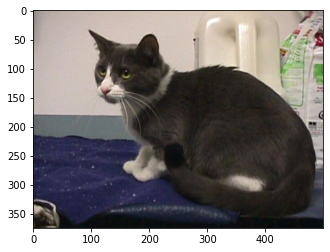

In [5]:
cat4=cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

In [6]:
cat4.shape

(375, 500, 3)

In [0]:
dog=cv2.imread('/content/CATS_DOGS/train/DOG/2.jpg')

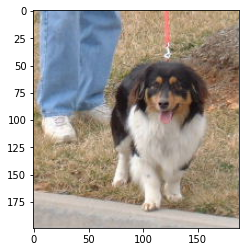

In [8]:
dog=cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)
plt.imshow(dog)

In [9]:
dog.shape

(199, 188, 3)

# prepare the data for the model

In [0]:
from keras.preprocessing.image import ImageDataGenerator


In [0]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1./255.,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest')

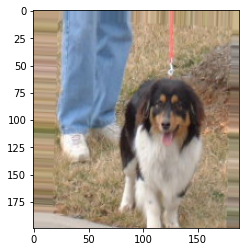

In [17]:
plt.imshow(image_gen.random_transform(dog))

In [0]:
from keras.models import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout

In [0]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3)))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))

model.add(Flatten())

In [0]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))


In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 73984)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [25]:
batch_size=16
training_image_gen=image_gen.flow_from_directory('/content/CATS_DOGS/train',
                                                 target_size=(150,150),
                                                 batch_size=16,
                                                 class_mode='binary')

Found 18743 images belonging to 2 classes.


In [26]:
test_image_den=image_gen.flow_from_directory('/content/CATS_DOGS/test',
                                                 target_size=(150,150),
                                                 batch_size=16,
                                                 class_mode='binary')

Found 6251 images belonging to 2 classes.


In [27]:
training_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [0]:
import warnings 
warnings.filterwarnings('ignore')

In [29]:
result=model.fit_generator(training_image_gen,epochs=1,steps_per_epoch=150,validation_data=test_image_den,validation_steps=12)

Epoch 1/1
150/150 [==============================] - 25s 165ms/step - loss: 0.7047 - accuracy: 0.5279 - val_loss: 0.6958 - val_accuracy: 0.4740


In [33]:
result.history['accuracy']

[0.52791667]

In [0]:
from keras.models import load_model